In [1]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import re
import tqdm
import unicodedata
from bs4 import BeautifulSoup
import contractions
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional

In [3]:
def load_dataset(filepath):
    dataset = pd.read_csv(filepath)

    # Get Sentences
    X_sentences = dataset['tweet_text'].to_numpy()

    # Get Labels
    labels = dataset['cyberbullying_type'].unique()
    label_dict = dict((j, i) for i, j in enumerate(labels))
    class_nums = [label_dict[x] for x in dataset['cyberbullying_type']]
    y_class = np.zeros(shape=(len(X_sentences), len(labels)))
    for i in range(len(y_class)):
        y_class[i, class_nums[i]] = 1

    return X_sentences, y_class, labels

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text


def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process(X_data):
    new_X = []
    # for sentence in X_data:
        # doc = strip_html_tags(doc)
        #
        # sentence = sentence.translate(sentence.maketrans("\n\t\r", "   "))
        # sentence = sentence.translate(sentence.maketrans('', '', string.punctuation))
        # sentence = re.sub(r'[^a-zA-Z0-9\s]', '', sentence, re.I | re.A)
        # new_X.append(sentence)

    for doc in tqdm.tqdm(X_data):
        doc = strip_html_tags(doc)
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))
        doc = doc.lower()
        doc = remove_accented_chars(doc)
        doc = contractions.fix(doc)
        # lower case and remove special characters\whitespaces
        doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I | re.A)
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()
        new_X.append(doc)

    print(new_X[-4])
    print(new_X[-1])

    return np.array(new_X)

In [8]:
X_sentences, y_class, labels = load_dataset("/content/data/cyberbullying_tweets.csv")
class_count = len(labels)

print(labels)
print('shape: {}'.format(X_sentences.shape))

del_array = []
for i in range(len(X_sentences)):
    if len(X_sentences[i]) > 400:
        del_array.append(i)
        # print('{} ({}): {}'.format(i, len(X_sentences[i]), X_sentences[i]))

X_sentences = np.delete(X_sentences, del_array, axis=0)
y_class = np.delete(y_class, del_array, axis=0)

print('total: {}'.format(len(del_array)))
print('new shape: {}'.format(X_sentences.shape))
print(max([len(x) for x in X_sentences]))


# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_sentences, y_class, test_size=0.2, random_state=5, stratify=y_class)


X_train = pre_process(X_train)
X_test = pre_process(X_test)

t = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(X_train)
t.word_index['<PAD>'] = 0

train_sequences = t.texts_to_sequences(X_train)
test_sequences = t.texts_to_sequences(X_test)

print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

MAX_SEQUENCE_LENGTH = 400
# pad dataset to a maximum review length in words
X_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
      

['not_cyberbullying' 'gender' 'religion' 'other_cyberbullying' 'age'
 'ethnicity']
shape: (47692,)
total: 31
new shape: (47661,)
395


  0%|          | 0/38128 [00:00<?, ?it/s]<ipython-input-3-d94954aac1af>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
  2%|▏         | 873/38128 [00:00<00:04, 8726.80it/s]<ipython-input-3-d94954aac1af>:18: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
100%|██████████| 38128/38128 [00:04<00:00, 9206.70it/s]


he means that the democrats use minorities for their electionthey see the black community as people who are easy to manipulate cuz you still living in the past with all that anger the democrats will use anything that seems racist to get you to a point where they can control you
careful with rocket a violent felon he will claim to respect women and defend them but he calls other females bitches and other profanity be careful what you believe with rocket stay safe


100%|██████████| 9533/9533 [00:01<00:00, 9333.34it/s]


idiots like these are the reason women are so scared to come out when sexual assault happens to them there is nothing wrong with women who go through abuse if you have this mentality kindly unfollow me and go fuck yourself you are a disgrace to muslims everywhere
yes ok he is fine with gays and he is against rape jokes but again he does not say anything apologizing about the women thing
Vocabulary size=56446
Number of Documents=38128


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 200)          11289200  
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 11,627,638
Trainable params: 11,627,638
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
954/954 [==============================] - 65s 64ms/step - loss: 0.6083 - accuracy: 0.7464 - val_l

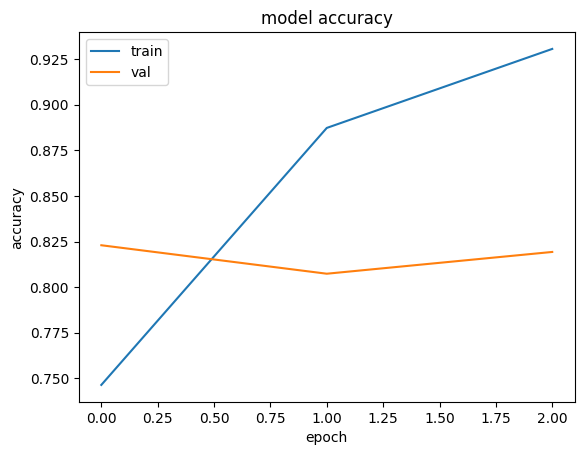

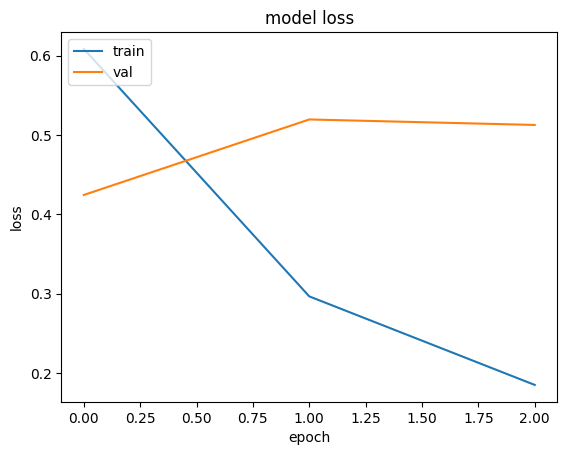

In [10]:
VOCAB_SIZE = len(t.word_index)

EMBED_SIZE = 200
EPOCHS = 3
BATCH_SIZE = 32

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(128, activation='tanh')))
model.add(Dropout(0.2))
model.add(Dense(class_count, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

logger = tf.keras.callbacks.CSVLogger('lstm_history.csv')
history = model.fit(X_train, y_train, validation_split=0.2, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, callbacks=[logger])
model.save('../Models/LSTM_cyberbully_bin_class')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show() 

298/298 [==============================] - 4s 11ms/step
(9533,)
(9533,)
Accuracy: 82.20%


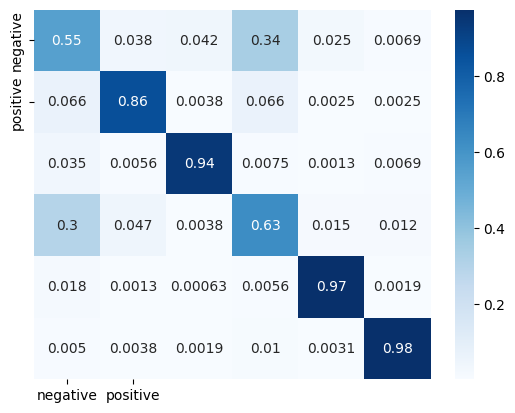

In [11]:
scores = model.evaluate(X_test, y_test, verbose=1)
predictions = model.predict(X_test)
predictions = tf.math.argmax(predictions, axis=1)
y_test = tf.math.argmax(y_test, axis=1)
print(y_test.shape)
print(predictions.shape)
print("Accuracy: %.2f%%" % (scores[1] * 100))
labels = ['negative', 'positive']
# print(classification_report(y_test, predictions, labels=labels))

cfn = confusion_matrix(y_test, predictions, normalize='true')
sns.heatmap(cfn, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.show()